In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import glob

In [7]:
def read_lat_lon(infilename):
    
    infile = open(infilename,'r')
    lines = infile.readlines()[18:20]
    infile.close()
    latparts=lines[0].split(':')[1].strip()[:-1].split()
    lonparts=lines[1].split(':')[1].strip()[:-1].split()
    lat = float(latparts[0])+float(latparts[1])/60
    lon = -(float(lonparts[0])+float(lonparts[1])/60)
    
    return(lat,lon)
    

In [8]:
def read_xbt(infile):
    
    df = pd.read_csv(infile,skiprows=36,sep='\t',names=['Time','Resistance',
            'Depth','Temp','Sound_vel']).loc[1:]
    sound_vel = df['Sound_vel'].values
    depth = df['Depth'].values
    
    return(sound_vel,depth)

In [9]:
XBT = glob.glob('T7*.edf')

T7_00124.edf
T7_00125.edf
T7_00127.edf
T7_00128.edf
T7_00129.edf
T7_00130.edf
T7_00131.edf
T7_00132.edf
T7_00133.edf
T7_00134.edf
T7_00135.edf


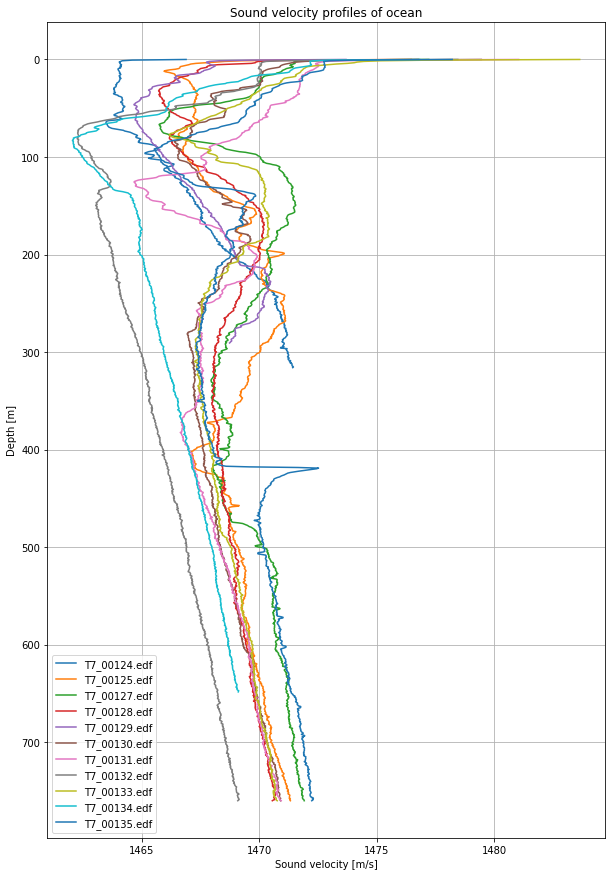

In [12]:
plt.figure(figsize=(10,15))
allx = []
ally = []
for fname in XBT:
    print(fname)
    (lat,lon) = read_lat_lon(fname)
    #print(lat,lon)
    v,d = read_xbt(fname)
    for element in zip(v,d):
        allx.append(element[1])
        ally.append(element[0])
    plt.plot(v,d,label='%s' %fname)

plt.legend()
plt.gca().invert_yaxis()
plt.xlabel('Sound velocity [m/s]')
plt.ylabel('Depth [m]')
plt.title('Sound velocity profiles of ocean')
plt.grid()

In [13]:
from scipy import polyfit

In [14]:
coefs = polyfit(allx,ally,deg=3)

In [15]:
def vdepth(coefs,depth):
    
    v = coefs[0]*depth**3 + coefs[1]*depth**2 + coefs[2]*depth + coefs[3]
    if v > 1500:
        v = 1500
    return v

In [16]:
X = np.linspace(0,2000,2000)
Y = coefs[0]*X**3 + coefs[1]*X**2 + coefs[2]*X + coefs[3]
Y[Y>1500] = 1500

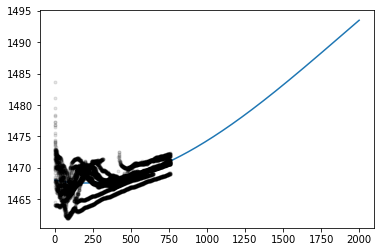

In [17]:
plt.figure(0)
plt.plot(X,Y)
plt.plot(allx,ally,'k.',alpha=0.1)

In [18]:
from scipy import integrate

In [19]:
slowness = 1.0/Y
distance = d

In [20]:
travel_time = integrate.simps(slowness,x=X)

In [21]:
travel_time

1.3546243008229475

In [22]:
sdist = 8000
depth = 3000
m = depth/sdist
depth_speeds = []
distance = []
for x in range(sdist):
    y = m*x
    dist = np.sqrt(x**2 + y**2)
    distance.append(dist)
    depth_speeds.append(vdepth(coefs,y))

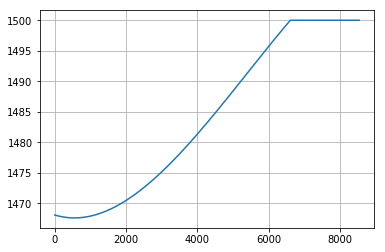

In [23]:
plt.plot(distance,depth_speeds)
plt.grid()

In [24]:
np.sqrt(depth**2 + sdist**2)

8544.003745317532

In [25]:
slowness = 1.0/np.array(depth_speeds)
travel_time = integrate.simps(slowness,x=np.array(distance))

In [26]:
travel_time

5.757243260981075

We need to know the angle at which the signal is travelling though the velocity profile - which is related to the distance. In reality we really need to do a grid search over distances, taking the distance calculated assuming a constant sounds speed as a first guess